In [1]:
    # Notebook: Preprocessing e Preparazione Dati per il Machine Learning
    #**Obiettivo:** Utilizzare il dataset di feature estratto da pgAdmin 
    #(`customer_features.csv`) per creare una pipeline di preprocessing e 
    #preparare i dati per l'addestramento di un modello di Machine Learning. 
    #**Questo notebook si ferma prima del training del modello.**"
  
    
    ### 1. Import delle Librerie"
 
    import pandas as pd
    import numpy as n
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    
    import warnings
    warnings.filterwarnings("ignore")

In [3]:
                        
    ### 2. Caricamento del Dataset
    #"Carichiamo il file `customer_features.csv` che hai esportato da pgAdmin."
try:
     df = pd.read_csv("customer_features.csv")
     print("Dataset caricato con successo!")
     display(df.head())
except FileNotFoundError:
    print("ERRORE: File 'customer_features.csv' non trovato. Assicurati di averlo esportato da pgAdmin e salvato nella stessa directory di questo notebook.")

Dataset caricato con successo!


,cliente_sk,nome_cliente,cognome_cliente,citta,regione,data_ultimo_ordine,data_primo_ordine,numero_ordini,fatturato_totale,scontrino_medio,importo_massimo_ordine,totale_prodotti_acquistati,num_prodotti_distinti,num_categorie_distinte
0,1,Eugenia,Caracciolo,Suello,Lombardia,2025-10-04,2024-01-22,7,11996.02,922.770769,2165.96,14,11,6
1,2,Chiara,Avogadro,Fabbrica Durini,Emilia-Romagna,2025-05-08,2024-04-09,4,7121.31,890.163750,1719.28,9,8,6
2,3,Giampiero,Morandini,NaN,Marche,2025-10-16,2024-02-10,3,5626.54,803.791429,1540.01,8,7,4
3,4,Renata,Opizzi,Campolattaro,Toscana,2025-07-27,2024-06-07,9,14591.75,1042.267857,2316.50,18,11,8
4,5,Michelangelo,Foscari,Pej,Marche,2025-02-13,2024-12-05,2,5002.75,1000.550000,1607.25,6,5,3


In [4]:
### 3. Feature Engineering Aggiuntivo e Definizione del Target\n",
#"Creiamo le ultime feature derivate e la nostra variabile target `is_churn`."
# Conversione delle colonne di data"
df["data_ultimo_ordine"] = pd.to_datetime(df["data_ultimo_ordine"])
df["data_primo_ordine"] = pd.to_datetime(df["data_primo_ordine"])

# Data di riferimento per il calcolo (es. il giorno dopo l'ultimo ordine registrato nel dataset)
snapshot_date = df["data_ultimo_ordine"].max() + pd.DateOffset(days=1)

# Creazione feature di Recency e Tenure
df["recency"] = (snapshot_date - df["data_ultimo_ordine"]).dt.days
df["tenure"] = (snapshot_date - df["data_primo_ordine"]).dt.days
 
# Definizione della variabile Target
# Un cliente è considerato 'churned' se non ha fatto acquisti da più di 90 giorni
df["is_churn"] = (df["recency"] > 90).astype(int)

print("Distribuzione della variabile target:")
print(df["is_churn"].value_counts(normalize=True))

display(df.head())

Distribuzione della variabile target:
is_churn
1    0.548135
0    0.451865
Name: proportion, dtype: float64


,cliente_sk,nome_cliente,cognome_cliente,citta,regione,data_ultimo_ordine,data_primo_ordine,numero_ordini,fatturato_totale,scontrino_medio,importo_massimo_ordine,totale_prodotti_acquistati,num_prodotti_distinti,num_categorie_distinte,recency,tenure,is_churn
0,1,Eugenia,Caracciolo,Suello,Lombardia,2025-10-04,2024-01-22,7,11996.02,922.770769,2165.96,14,11,6,45,666,0
1,2,Chiara,Avogadro,Fabbrica Durini,Emilia-Romagna,2025-05-08,2024-04-09,4,7121.31,890.163750,1719.28,9,8,6,194,588,1
2,3,Giampiero,Morandini,NaN,Marche,2025-10-16,2024-02-10,3,5626.54,803.791429,1540.01,8,7,4,33,647,0
3,4,Renata,Opizzi,Campolattaro,Toscana,2025-07-27,2024-06-07,9,14591.75,1042.267857,2316.50,18,11,8,114,529,1
4,5,Michelangelo,Foscari,Pej,Marche,2025-02-13,2024-12-05,2,5002.75,1000.550000,1607.25,6,5,3,278,348,1


In [6]:
# 4. Selezione delle Feature e Split Train/Test
# Selezioniamo le colonne che useremo come feature (X) e la nostra variabile target (y). 
# Poi, dividiamo il dataset.
# Selezioniamo le feature numeriche e categoriche
numeric_features = ["recency", "tenure", "numero_ordini", "fatturato_totale", "scontrino_medio", "totale_prodotti_acquistati", "num_prodotti_distinti", "num_categorie_distinte"]
categorical_features = ["regione"]

# Definiamo X e y"
X = df[numeric_features + categorical_features]
y = df["is_churn"]

# Suddivisione in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")

Dimensioni X_train: (15872, 9)
Dimensioni X_test: (3968, 9)


In [ ]:
### 5. Creazione della Pipeline di Preprocessing
#Costruiamo una pipeline con `ColumnTransformer` per applicare trasformazioni diverse alle colonne numeriche e categoriche.

In [8]:
# Pipeline numeriche: imputazione + scaling
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# Pipeline categoriche: imputazione + one-hot encoding
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# ColumnTransformer: combina le due pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [9]:
### 6. Applicazione del Preprocessing
# Applichiamo la pipeline di preprocessing ai dati di training e test.


In [10]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Dimensioni X_train dopo il preprocessing: {X_train_processed.shape}")
print(f"Dimensioni X_test dopo il preprocessing: {X_test_processed.shape}")


Dimensioni X_train dopo il preprocessing: (15872, 28)
Dimensioni X_test dopo il preprocessing: (3968, 28)


In [11]:
### 7. Conclusione
# Abbiamo costruito una pipeline che preprocessa i dati e li prepara per un modello di ML.

# I dati `X_train_processed`, `y_train`, `X_test_processed`, `y_test` sono ora pronti per essere usati nel training e nella valutazione del modello.


In [12]:
### 7.0 Dati pronti per il Machine Learning

# Osserviamo un’estrazione delle feature dopo il preprocessing.
# Questi sono i dati che verranno realmente forniti al modello.


In [13]:
X_train_ml = pd.DataFrame(
    X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
)

display(X_train_ml.head())


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.889487,0.611580,-0.413632,-0.097855,0.159328,-0.062657,0.086915,-0.262370,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.277823,0.955619,-0.873828,0.103843,2.652552,-0.062657,-0.682330,-0.844875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.719990,0.655500,0.506761,0.735180,-0.221425,0.552838,0.343330,0.902641,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.808423,0.999539,1.887350,1.010599,-0.630123,1.476079,1.368989,1.485146,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.941073,0.692100,0.966957,0.834294,0.762629,0.706711,0.856160,1.485146,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
### 7.1 Effetto dello scaling sulle feature numeriche

#Confrontiamo la distribuzione delle feature numeriche prima e dopo lo scaling.


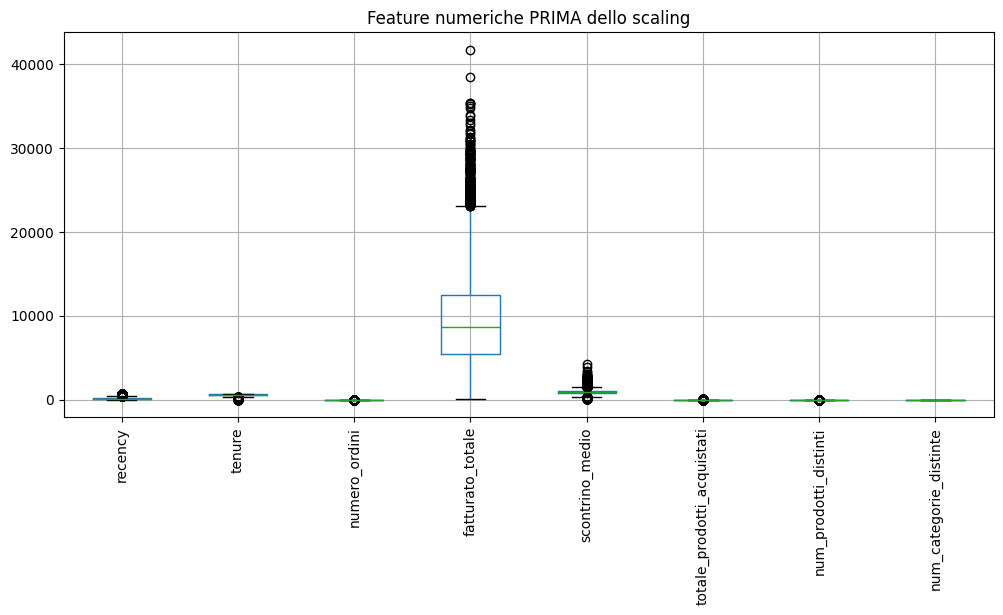

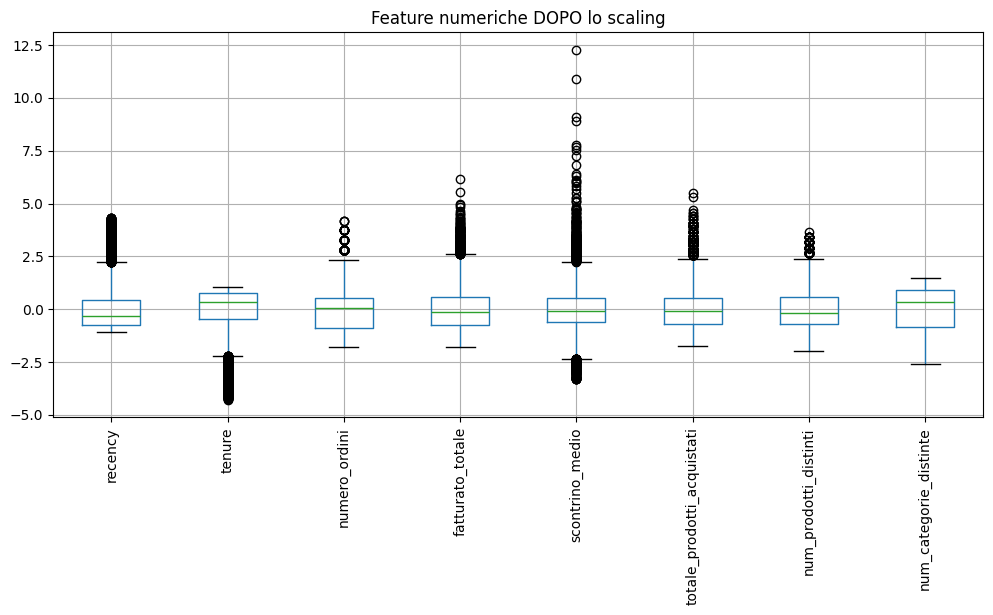

In [15]:
X[numeric_features].boxplot(rot=90, figsize=(12,5))
plt.title("Feature numeriche PRIMA dello scaling")
plt.show()

X_scaled = pd.DataFrame(
    preprocessor.named_transformers_["num"]
    .fit_transform(X_train[numeric_features]),
    columns=numeric_features
)

X_scaled.boxplot(rot=90, figsize=(12,5))
plt.title("Feature numeriche DOPO lo scaling")
plt.show()


In [16]:
### 7.2 Trasformazione delle variabili categoriche (One-Hot Encoding)

# Osserviamo come la variabile `regione` viene trasformata in più colonne numeriche.


In [17]:
ohe = preprocessor.named_transformers_["cat"]["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

cat_feature_names


array(['regione_Abruzzo', 'regione_Basilicata', 'regione_Calabria',
       'regione_Campania', 'regione_Emilia-Romagna',
       'regione_Friuli-Venezia Giulia', 'regione_Lazio',
       'regione_Liguria', 'regione_Lombardia', 'regione_Marche',
       'regione_Molise', 'regione_Piemonte', 'regione_Puglia',
       'regione_Sardegna', 'regione_Sicilia', 'regione_Toscana',
       'regione_Trentino-Alto Adige', 'regione_Umbria',
       "regione_Valle d'Aosta", 'regione_Veneto'], dtype=object)

In [18]:
### 7.3 Relazione tra una feature chiave e il churn

# Analizziamo la relazione tra `recency` e la variabile target `is_churn`.


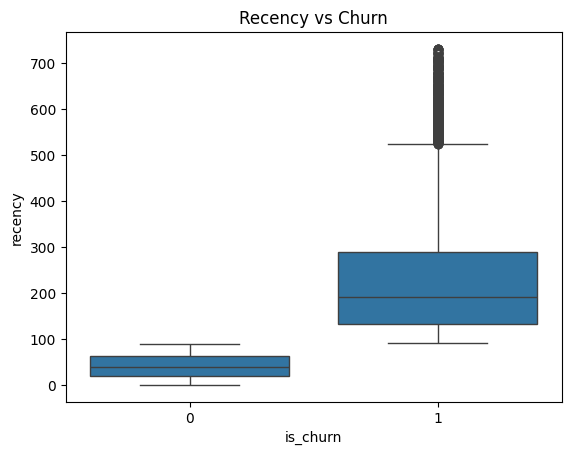

In [19]:
sns.boxplot(x="is_churn", y="recency", data=df)
plt.title("Recency vs Churn")
plt.show()
